In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split


In [34]:
df = pd.read_csv(r'd:\DaneshKar\Project_Eden\loan.csv')

# نمایش داده‌ها
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [35]:
df2 = pd.read_csv(r'd:\DaneshKar\Project_Eden\test.csv')

# نمایش داده‌ها
df2.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


# Loan Data Analysis for Machine Learning

## Column Descriptions:
1. **`Gender`**  
   The gender of the loan applicant (e.g., Male or Female).

2. **`Married`**  
   The marital status of the applicant (Yes for married, No for unmarried).

3. **`Dependents`**  
   The number of dependents the applicant has (0, 1, 2, or 3+ for more than three).

4. **`Education`**  
   The education level of the applicant (Graduate for college graduates, Not Graduate otherwise).

5. **`Self_Employed`**  
   Whether the applicant is self-employed (Yes for self-employed, No otherwise).

6. **`ApplicantIncome`**  
   The income of the primary loan applicant as a numeric value.

7. **`CoapplicantIncome`**  
   The income of the co-applicant, if any.

8. **`LoanAmount`**  
   The loan amount requested (in thousands). Missing values (e.g., NaN) need to be handled.

9. **`Loan_Amount_Term`**  
   The term of the loan repayment in months (typically 360 months or 30 years).

10. **`Credit_History`**  
    Credit history of the applicant (1.0 for good credit history, 0.0 for bad).

11. **`Property_Area`**  
    The location of the property (Urban, Rural, or Semiurban).

12. **`Loan_Status`**  
    Whether the loan was approved (Y for approved, N for rejected).

---

## Important Features for Machine Learning:

To predict the `Loan_Status`, the following features are likely the most important:

1. **`Credit_History`**  
   Credit history is one of the most critical factors for loan approval decisions.

2. **`LoanAmount`**  
   The loan amount requested, especially in relation to the applicant's income, can heavily influence approval.

3. **`ApplicantIncome` and `CoapplicantIncome`**  
   Combined income (the ability to repay the loan) is crucial.

4. **`Loan_Amount_Term`**  
   Loan tenure can impact risk assessment, with longer terms potentially being riskier.

5. **`Property_Area`**  
   The geographical location of the property may play a role based on bank policies.

6. **`Education` and `Self_Employed`**  
   Education and employment status can indicate income stability.

7. **`Dependents` and `Married`**  
   The number of dependents and marital status can reflect financial responsibilities and capacity.

---

## Suggested Steps:

1. **Data Preprocessing**:  
   - Handle missing values (e.g., fill `LoanAmount` using mean, median, or a specific strategy).
   - Convert categorical variables (e.g., `Gender`, `Education`) into numerical ones using Label Encoding or One-Hot Encoding.

2. **Correlation Analysis**:  
   Analyze correlations between features and the target column (`Loan_Status`) to determine feature importance.

3. **Feature Engineering**:  
   Create new features, such as the income-to-loan ratio:
   ```python
   df['Income_to_Loan_Ratio'] = (df['ApplicantIncome'] + df['CoapplicantIncome']) / df['LoanAmount']


In [36]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [37]:
df2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


# Checking null objects to find the optimal strategy
#### whether rows containing **missing values** have critical information in other columns.
#### **important columns** before and after removing null values
#### Average key columns before and after deletion
- LoanAmount
- ApplicantIncome
- Credit_history
- ...


In [40]:
missing_rows = df[df.isnull().any(axis=1)]

print(missing_rows['Loan_Status'].value_counts())


Loan_Status
Y    90
N    44
Name: count, dtype: int64


In [41]:
# درصد داده‌های گمشده در ستون‌های مهم
important_columns = ['ApplicantIncome', 'LoanAmount', 'Credit_History']
print(missing_rows[important_columns].isnull().sum() / len(missing_rows))


ApplicantIncome    0.000000
LoanAmount         0.164179
Credit_History     0.373134
dtype: float64


# Check 
### **important columns** before and after removing null values
- LoanAmount
- ApplicantIncome
- Credit_history

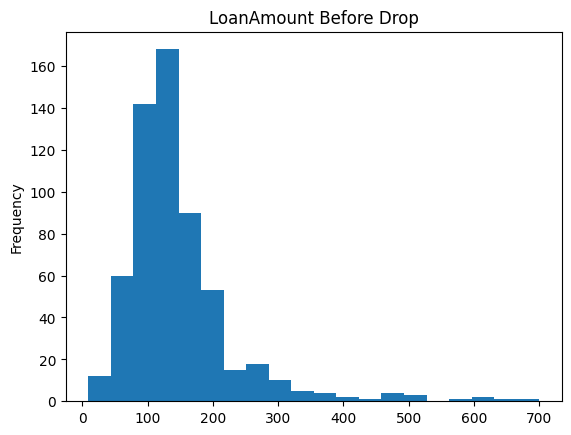

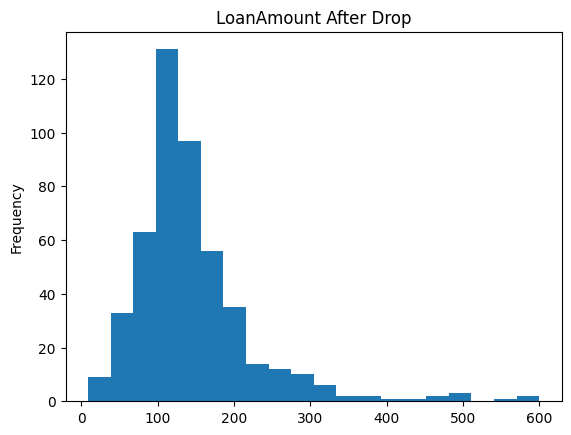

In [42]:

df['LoanAmount'].plot(kind='hist', title='LoanAmount Before Drop', bins=20)
plt.show()


loan_data_dropped = df.dropna()
loan_data_dropped['LoanAmount'].plot(kind='hist', title='LoanAmount After Drop', bins=20)
plt.show()


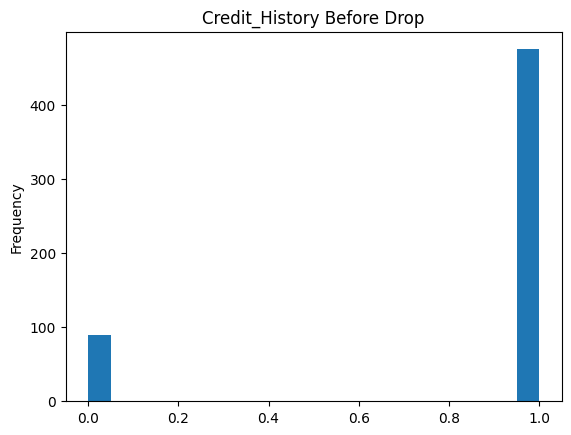

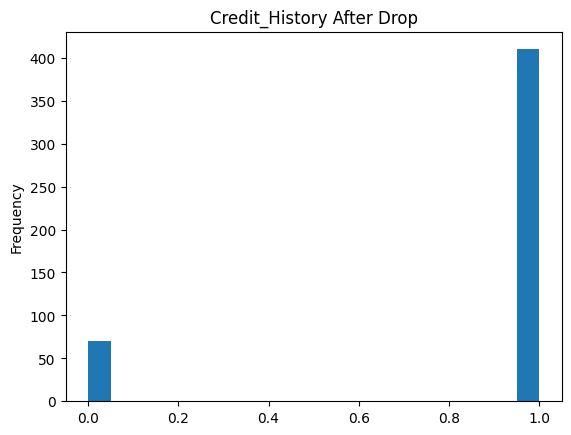

In [43]:

df['Credit_History'].plot(kind='hist', title='Credit_History Before Drop', bins=20)
plt.show()


Credit_History_data_dropped = df.dropna()
Credit_History_data_dropped['Credit_History'].plot(kind='hist', title='Credit_History After Drop', bins=20)
plt.show()


In [44]:
# میانگین ستون‌های کلیدی قبل و بعد از حذف
print("Before Drop:")
print(df[important_columns].mean())

print("After Drop:")
print(loan_data_dropped[important_columns].mean())


Before Drop:
ApplicantIncome    5403.459283
LoanAmount          146.412162
Credit_History        0.842199
dtype: float64
After Drop:
ApplicantIncome    5364.231250
LoanAmount          144.735417
Credit_History        0.854167
dtype: float64


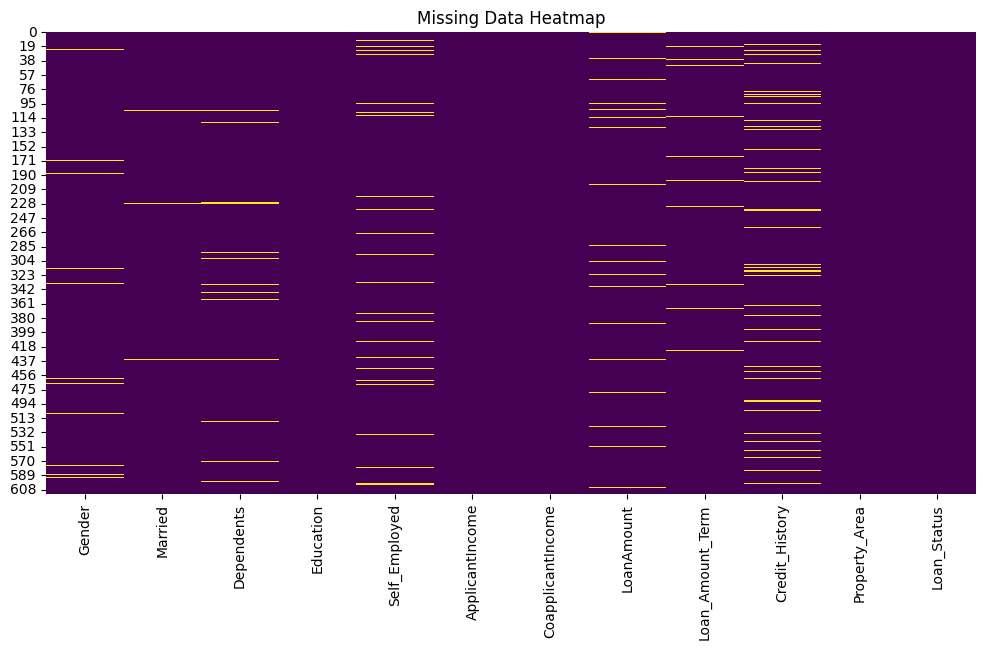

In [45]:
# بررسی مقادیر گمشده در کل داده‌ها
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

### Conclusion and Recommendation:

1. **Dropping Rows is Acceptable:**  
   The statistical changes show that dropping rows with missing values does not significantly impact the mean of key columns. This indicates that removing rows with missing data is a reasonable choice for your project and does not require complex imputation methods.

2. **Impact on Distribution:**  
   Considering last table, removing all rows with Nan values is not appropriate. therefore, we make different decisions based on the nature of each column.



### Filling NaN values in the columns **Gender**, **Married**, **Dependents**, and **Self_Employed** using the **mode**.
---

In [46]:

columns_to_fill = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']


for column in columns_to_fill:
    mode_value = df[column].mode()[0]  # Get the mode of the column
    df[column] = df[column].fillna(mode_value)  # Assign the updated column back to the DataFrame




In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [48]:
columns_to_fill2 = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']


for column in columns_to_fill2:
    mode_value = df2[column].mode()[0]  # Get the mode of the column
    df2[column] = df2[column].fillna(mode_value)  # Assign the updated column back to the DataFrame

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         367 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


#### Now we are targeting LoanAmount Column

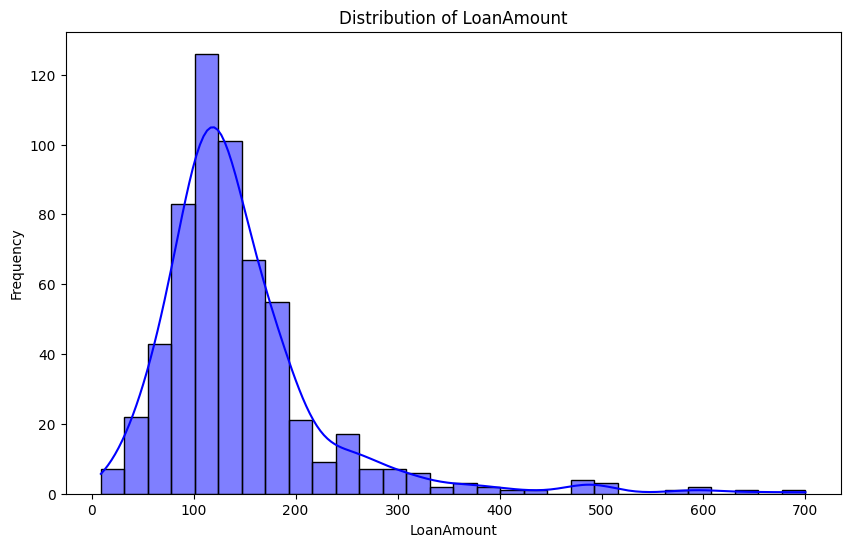

In [50]:
#LoanAmount histogram
plt.figure(figsize=(10,6))
sns.histplot(df['LoanAmount'].dropna(), kde=True, color='blue', bins=30)
plt.title('Distribution of LoanAmount')
plt.xlabel('LoanAmount')
plt.ylabel('Frequency')
plt.show()


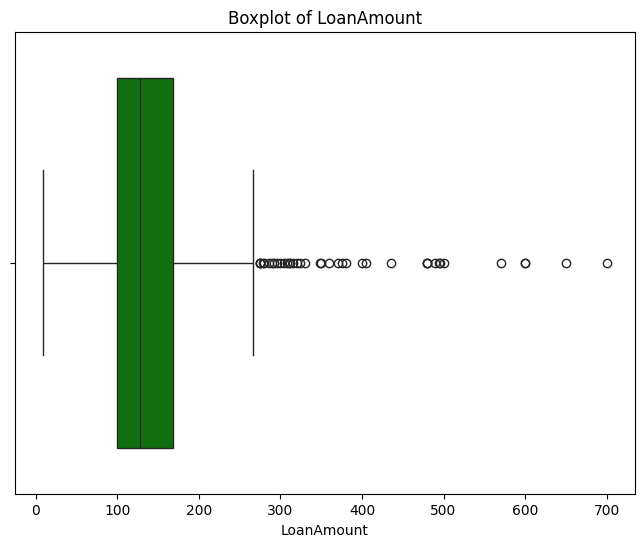

In [51]:
# رسم نمودار جعبه‌ای برای مشاهده مقادیر خارج از محدوده
plt.figure(figsize=(8,6))
sns.boxplot(x=df['LoanAmount'].dropna(), color='green')
plt.title('Boxplot of LoanAmount')
plt.xlabel('LoanAmount')
plt.show()


### The data has a lot of scatter and we want to reduce the effect of outlying values, so we use the median for LuanAmount column
---

In [52]:
loan_median = df['LoanAmount'].median()  # Calculate the median of the LoanAmount column
df['LoanAmount'] = df['LoanAmount'].fillna(loan_median)  # Replace NaN values with the median and assign back

# بررسی تغییرات
print(df['LoanAmount'].isnull().sum())  # نمایش تعداد مقادیر گمشده بعد از پر کردن

0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [54]:
loan_median2 = df2['LoanAmount'].median()  # Calculate the median of the LoanAmount column
df2['LoanAmount'] = df2['LoanAmount'].fillna(loan_median2)  # Replace NaN values with the median and assign back

# بررسی تغییرات
print(df2['LoanAmount'].isnull().sum())  # نمایش تعداد مقادیر گمشده بعد از پر کردن

0


In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         367 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


#### Now we are targeting LoanAmount_Term column

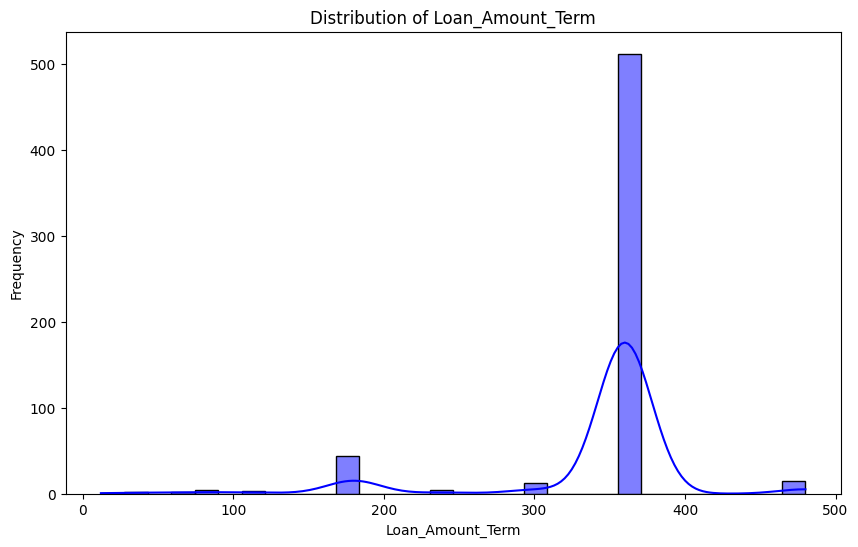

In [56]:


# رسم هیستوگرام برای ستون Loan_Amount_Term
plt.figure(figsize=(10,6))
sns.histplot(df['Loan_Amount_Term'].dropna(), kde=True, color='blue', bins=30)
plt.title('Distribution of Loan_Amount_Term')
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Frequency')
plt.show()


In [57]:

df.dropna(subset=['Loan_Amount_Term'], inplace=True)

print(f"Remaining rows after dropping NaN values in 'Loan_Amount_Term': {df.shape[0]}")


Remaining rows after dropping NaN values in 'Loan_Amount_Term': 600


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             600 non-null    object 
 1   Married            600 non-null    object 
 2   Dependents         600 non-null    object 
 3   Education          600 non-null    object 
 4   Self_Employed      600 non-null    object 
 5   ApplicantIncome    600 non-null    int64  
 6   CoapplicantIncome  600 non-null    float64
 7   LoanAmount         600 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     600 non-null    float64
 10  Property_Area      600 non-null    object 
 11  Loan_Status        600 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 60.9+ KB


In [59]:

df2.dropna(subset=['Loan_Amount_Term'], inplace=True)

print(f"Remaining rows after dropping NaN values in 'Loan_Amount_Term': {df2.shape[0]}")


Remaining rows after dropping NaN values in 'Loan_Amount_Term': 361


In [60]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             361 non-null    object 
 1   Married            361 non-null    object 
 2   Dependents         361 non-null    object 
 3   Education          361 non-null    object 
 4   Self_Employed      361 non-null    object 
 5   ApplicantIncome    361 non-null    int64  
 6   CoapplicantIncome  361 non-null    int64  
 7   LoanAmount         361 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     361 non-null    float64
 10  Property_Area      361 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 33.8+ KB


In [61]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [62]:
df2.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,Male,Yes,2,Graduate,No,13633,0,280.0,240.0,1.0,Urban
9,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


# Handling Categorical Data: Dummy Variables and Label Encoding

When working with datasets in Python, categorical data often needs to be converted into numerical formats to be used in machine learning models. This document explains two common techniques:

- **Dummy Variables (One-Hot Encoding)**
- **Label Encoding**
- etc ...
---



In [63]:
ordinal_mapping_education = {'Not Graduate': 0, 'Graduate': 1}
ordinal_mapping_dependents = {'0': 0, '1': 1, '2': 2, '3+': 3}

df['Education'] = df['Education'].map(ordinal_mapping_education)
df['Dependents'] = df['Dependents'].map(ordinal_mapping_dependents)

In [64]:
ordinal_mapping_education2 = {'Not Graduate': 0, 'Graduate': 1}
ordinal_mapping_dependents2 = {'0': 0, '1': 1, '2': 2, '3+': 3}

df2['Education'] = df2['Education'].map(ordinal_mapping_education2)
df2['Dependents'] = df2['Dependents'].map(ordinal_mapping_dependents2)

In [65]:
df = pd.get_dummies(df, columns=['Gender', 'Married', 'Self_Employed'], drop_first=True)


In [66]:
df2 = pd.get_dummies(df2, columns=['Gender', 'Married', 'Self_Employed'], drop_first=True)


In [67]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Property_Area'] = encoder.fit_transform(df['Property_Area'])


In [68]:
encoder = LabelEncoder()
df2['Property_Area'] = encoder.fit_transform(df2['Property_Area'])


In [69]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})


In [70]:
df['Gender_Male'] = df['Gender_Male'].astype(int)
df['Married_Yes'] = df['Married_Yes'].astype(int)
df['Self_Employed_Yes'] = df['Self_Employed_Yes'].astype(int)


In [71]:
df2['Gender_Male'] = df2['Gender_Male'].astype(int)
df2['Married_Yes'] = df2['Married_Yes'].astype(int)
df2['Self_Employed_Yes'] = df2['Self_Employed_Yes'].astype(int)


In [72]:
# df['Income_to_Loan_Ratio'] = (df['ApplicantIncome'] + df['CoapplicantIncome']) / df['LoanAmount']
# df.head(10)

In [73]:
df2.head(10)

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Married_Yes,Self_Employed_Yes
0,0,1,5720,0,110.0,360.0,1.0,2,1,1,0
1,1,1,3076,1500,126.0,360.0,1.0,2,1,1,0
2,2,1,5000,1800,208.0,360.0,1.0,2,1,1,0
3,2,1,2340,2546,100.0,360.0,1.0,2,1,1,0
4,0,0,3276,0,78.0,360.0,1.0,2,1,0,0
5,0,0,2165,3422,152.0,360.0,1.0,2,1,1,1
6,1,0,2226,0,59.0,360.0,1.0,1,0,0,0
7,2,0,3881,0,147.0,360.0,0.0,0,1,1,0
8,2,1,13633,0,280.0,240.0,1.0,2,1,1,0
9,0,0,2400,2400,123.0,360.0,1.0,1,1,0,0


# Data Analysis After Encoding

After performing **encoding** on the data, we analyze and visualize it using various plots to gain deeper insights. These visualizations include:

- **Heatmap**: To display correlations between features.
- **Subplot**: To show multiple plots within a single frame.
- **Box Plot**: To identify outliers and examine data distribution.
- **Pair Plot**: To explore relationships between multiple features.

These plots are essential tools for **Exploratory Data Analysis (EDA)** and help improve our understanding of the data structure.

### We redu this chapter after normalize/standardize faze


In [74]:
df.describe()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Self_Employed_Yes
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.755000,0.786667,5433.143333,1618.674867,146.441667,342.00000,0.861667,1.033333,0.690000,0.818333,0.653333,0.133333
std,1.011606,0.410003,6171.254154,2950.227722,84.818573,65.12041,0.345538,0.785228,0.462879,0.385891,0.476306,0.340218
min,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2880.500000,0.000000,102.000000,360.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,3813.500000,1149.000000,128.000000,360.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,5815.750000,2259.250000,165.000000,360.00000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000
max,3.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
df2.describe()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Married_Yes,Self_Employed_Yes
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.806094,0.772853,4802.897507,1549.418283,136.052632,342.537396,0.839335,1.077562,0.806094,0.631579,0.102493
std,1.065138,0.419570,4938.206158,2344.121873,61.170845,65.156643,0.367731,0.822983,0.395905,0.483046,0.303717
min,0.000000,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2860.000000,0.000000,101.000000,360.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,3786.000000,910.000000,125.000000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,5058.000000,2400.000000,157.000000,360.000000,1.000000,2.000000,1.000000,1.000000,0.000000
max,3.000000,1.000000,72529.000000,24000.000000,550.000000,480.000000,1.000000,2.000000,1.000000,1.000000,1.000000


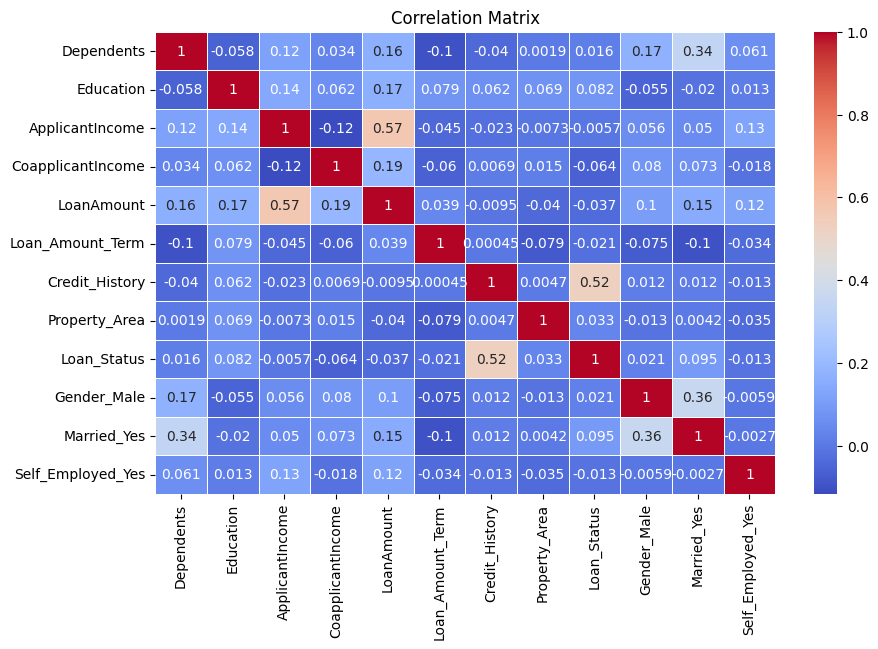

In [76]:
# رسم ماتریس همبستگی برای مشاهده همبستگی‌ها بین ویژگی‌ها
corr_matrix = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


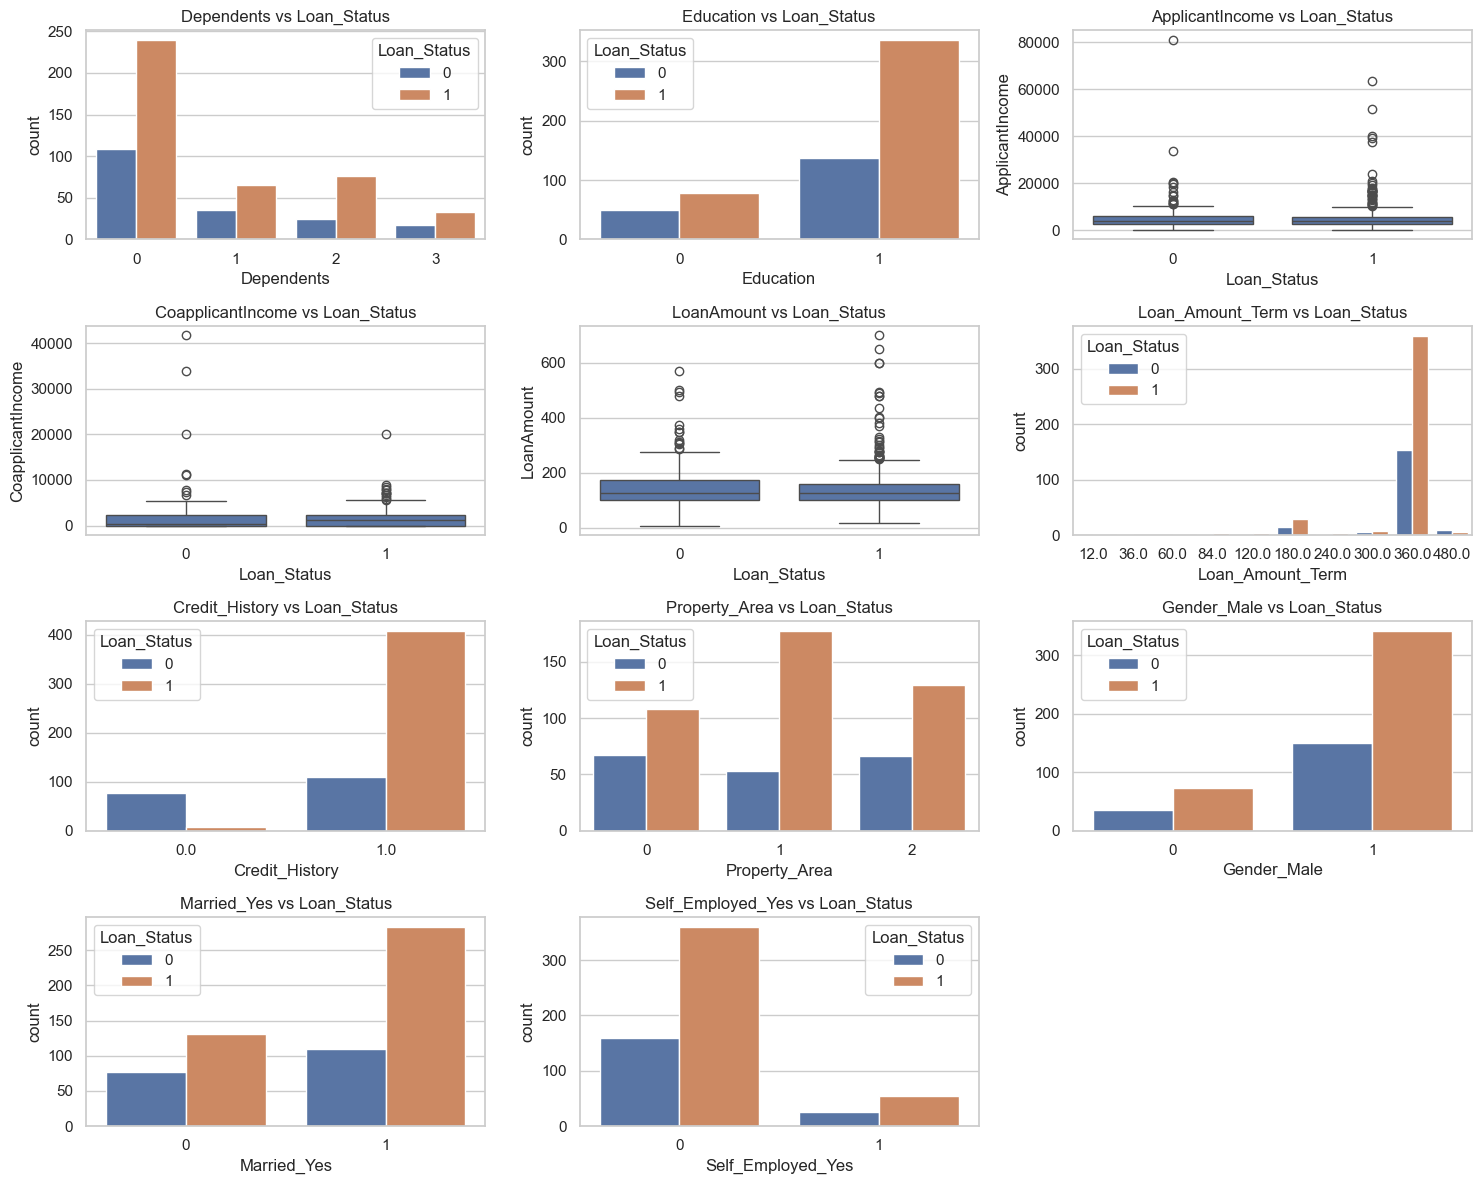

In [77]:

# تنظیمات کلی برای نمودارها
sns.set(style="whitegrid")

# ستون‌هایی که باید تحلیل شوند
columns_to_plot = ['Dependents', 'Education', 'ApplicantIncome', 'CoapplicantIncome', 
                   'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 
                   'Gender_Male', 'Married_Yes', 'Self_Employed_Yes']

# تنظیم ابعاد کلی نمودارها
plt.figure(figsize=(15, 12))

# رسم نمودارها برای هر ستون
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 3, i)  # ساخت چیدمان 4x3 برای نمودارها
    if df[column].dtype == 'object' or df[column].nunique() <= 10:
        sns.countplot(data=df, x=column, hue='Loan_Status')  # برای ویژگی‌های دسته‌ای
    else:
        sns.boxplot(data=df, x='Loan_Status', y=column)  # برای ویژگی‌های عددی
    plt.title(f'{column} vs Loan_Status')

# نمایش نمودارها
plt.tight_layout()
plt.show()


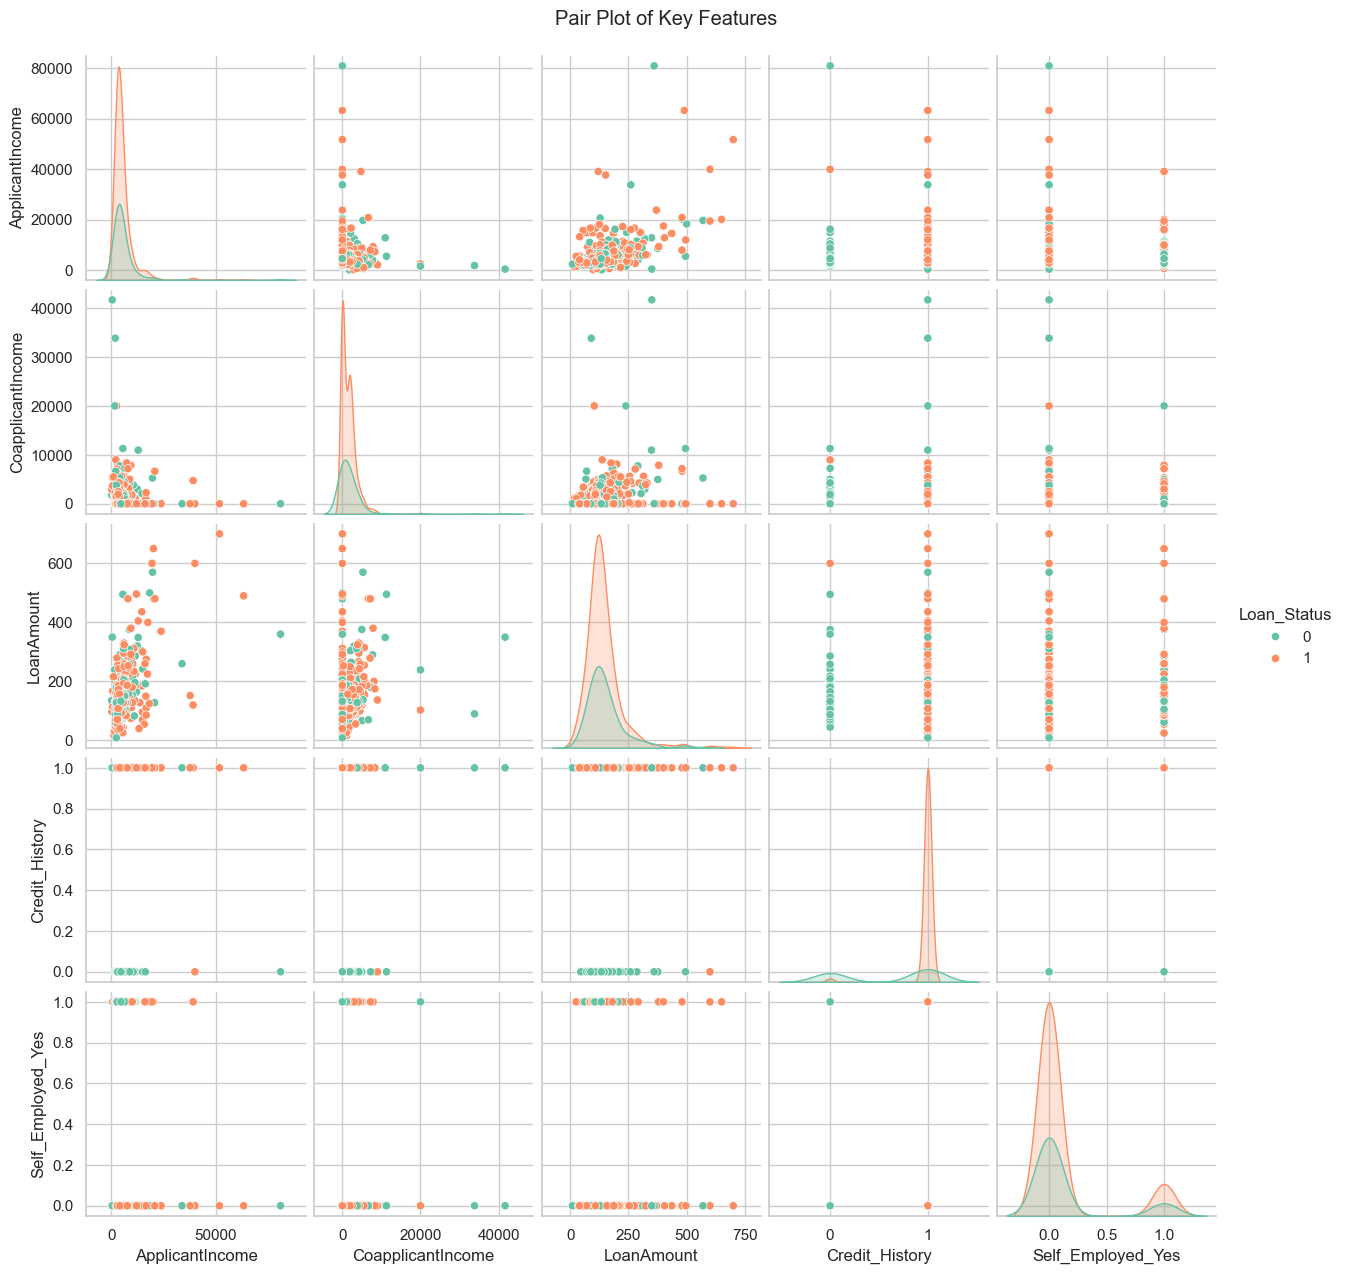

In [78]:
# انتخاب ویژگی‌های مهم
features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History','Self_Employed_Yes', 'Loan_Status']
sns.pairplot(df[features], hue='Loan_Status', palette='Set2', diag_kind='kde')
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

# Analysis of Impactful Columns

It is evident that **Credit_History** and **CoapplicantIncome** and **ApplicantIncome** have a considerable impact on the results. In most cases, when the person has an acceptable **credit history** and a **co-applicant** and **Self_Employed_Yes**, they are considered qualified.

However, it is important to further review the *disqualified items* for deeper investigation and analysis.


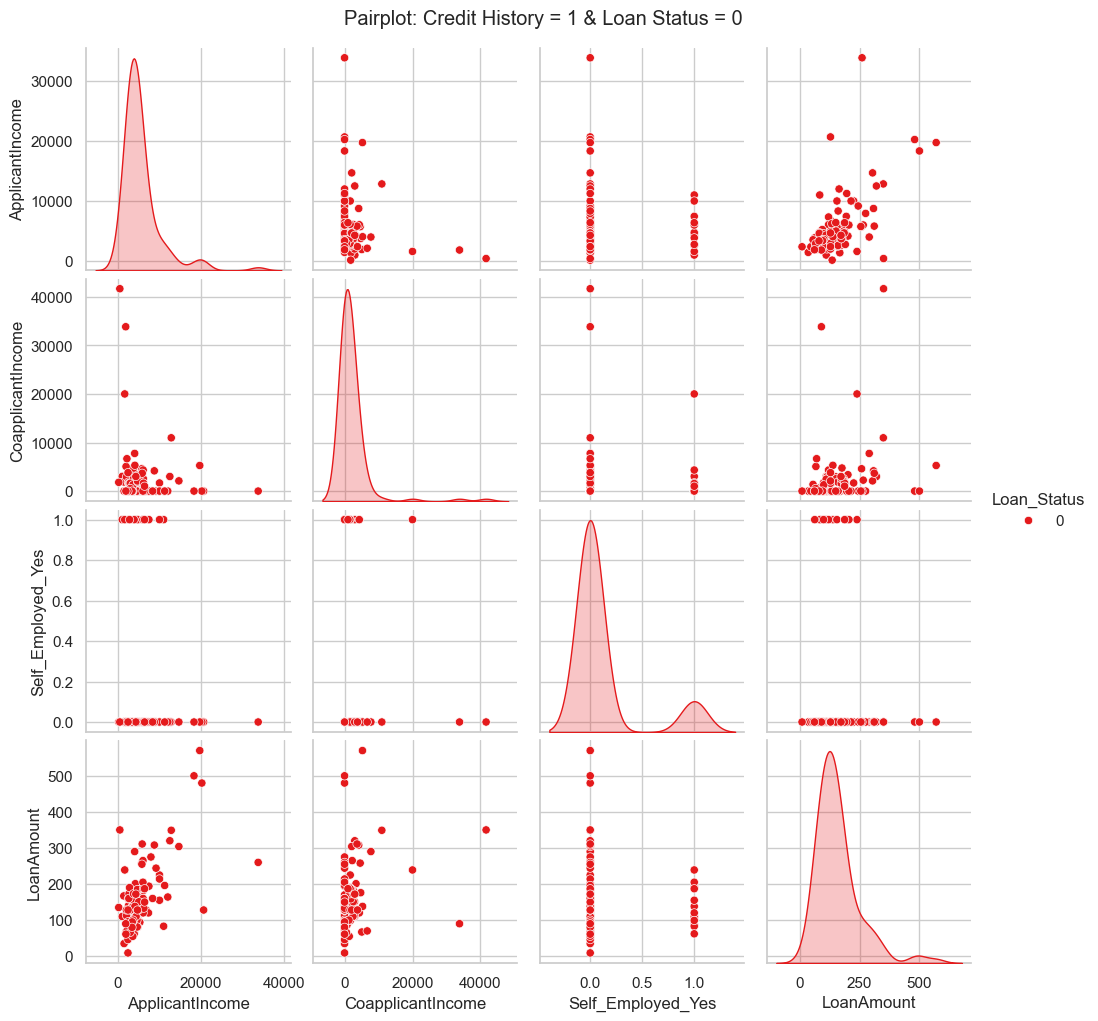

In [79]:
# فیلتر کردن داده‌ها بر اساس شرایط مشخص شده
filtered_data = df[(df['Credit_History'] == 1) & (df['Loan_Status'] == 0)]

# نمایش اولین چند ردیف از داده‌های فیلتر شده
filtered_data.head(10)



# رسم pairplot برای داده‌های فیلتر شده
features = ['ApplicantIncome', 'CoapplicantIncome','Self_Employed_Yes', 'LoanAmount', 'Loan_Status']
sns.pairplot(filtered_data[features], hue='Loan_Status', palette='Set1', diag_kind='kde')
plt.suptitle('Pairplot: Credit History = 1 & Loan Status = 0', y=1.02)
plt.show()


In [80]:
df.head(10)

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Self_Employed_Yes
0,0,1,5849,0.0,128.0,360.0,1.0,2,1,1,0,0
1,1,1,4583,1508.0,128.0,360.0,1.0,0,0,1,1,0
2,0,1,3000,0.0,66.0,360.0,1.0,2,1,1,1,1
3,0,0,2583,2358.0,120.0,360.0,1.0,2,1,1,1,0
4,0,1,6000,0.0,141.0,360.0,1.0,2,1,1,0,0
5,2,1,5417,4196.0,267.0,360.0,1.0,2,1,1,1,1
6,0,0,2333,1516.0,95.0,360.0,1.0,2,1,1,1,0
7,3,1,3036,2504.0,158.0,360.0,0.0,1,0,1,1,0
8,2,1,4006,1526.0,168.0,360.0,1.0,2,1,1,1,0
9,1,1,12841,10968.0,349.0,360.0,1.0,1,0,1,1,0


In [81]:
df2.head(10)

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Male,Married_Yes,Self_Employed_Yes
0,0,1,5720,0,110.0,360.0,1.0,2,1,1,0
1,1,1,3076,1500,126.0,360.0,1.0,2,1,1,0
2,2,1,5000,1800,208.0,360.0,1.0,2,1,1,0
3,2,1,2340,2546,100.0,360.0,1.0,2,1,1,0
4,0,0,3276,0,78.0,360.0,1.0,2,1,0,0
5,0,0,2165,3422,152.0,360.0,1.0,2,1,1,1
6,1,0,2226,0,59.0,360.0,1.0,1,0,0,0
7,2,0,3881,0,147.0,360.0,0.0,0,1,1,0
8,2,1,13633,0,280.0,240.0,1.0,2,1,1,0
9,0,0,2400,2400,123.0,360.0,1.0,1,1,0,0


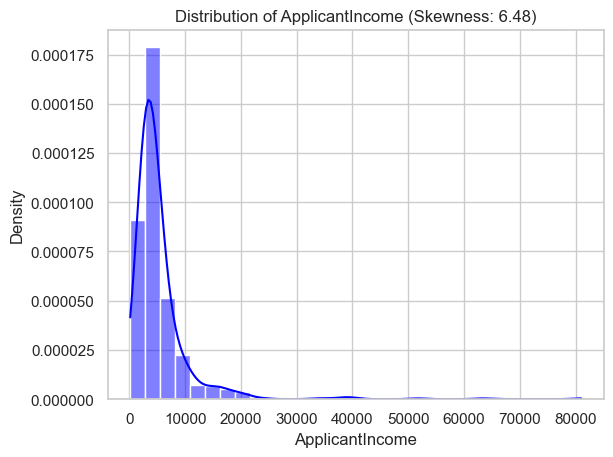

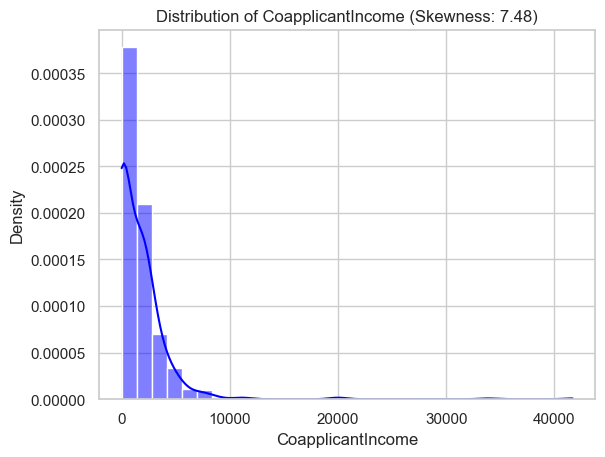

{'ApplicantIncome': {'skewness': np.float64(6.479033437789096)}, 'CoapplicantIncome': {'skewness': np.float64(7.482487350508525)}}


In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Columns to analyze
columns_to_check = ['ApplicantIncome', 'CoapplicantIncome']

# Compute skewness and visualize distributions
analysis_results = {}
for col in columns_to_check:
    skewness = df[col].skew()
    analysis_results[col] = {'skewness': skewness}

    # Plot distribution
    sns.histplot(df[col], kde=True, bins=30, color='blue', stat="density")
    plt.title(f'Distribution of {col} (Skewness: {skewness:.2f})')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

print(analysis_results)


Log_ApplicantIncome: Skewness after transformation = 0.48


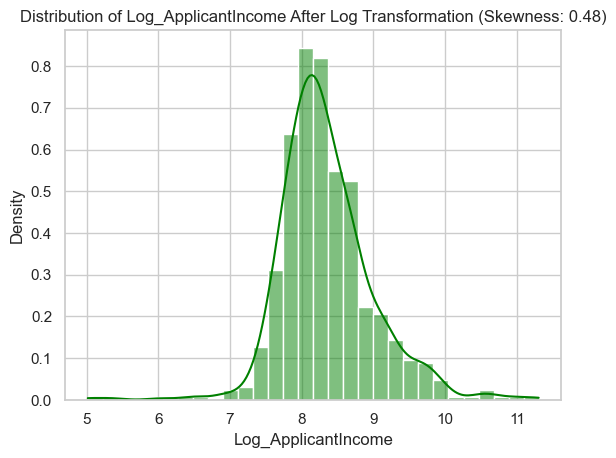

Log_CoapplicantIncome: Skewness after transformation = -0.16


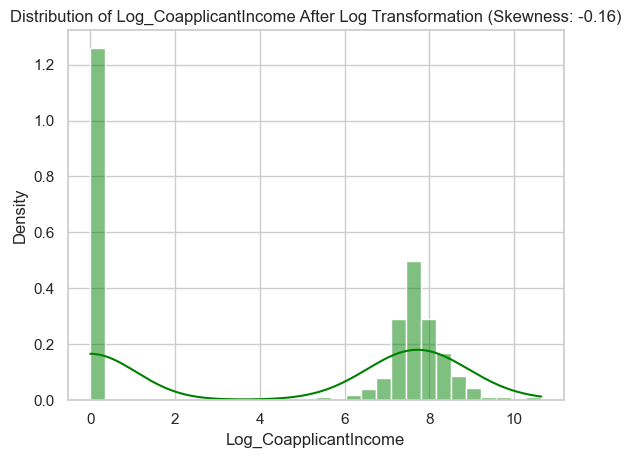

In [83]:

# Apply logarithmic transformation for ApplicantIncome and CoapplicantIncome
df['Log_ApplicantIncome'] = np.log1p(df['ApplicantIncome'])
df['Log_CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])

# Compute skewness for the transformed data and plot their distributions
for col in ['Log_ApplicantIncome', 'Log_CoapplicantIncome']:
    skewness = df[col].skew()
    print(f"{col}: Skewness after transformation = {skewness:.2f}")
    
    # Plot the distribution
    sns.histplot(df[col], kde=True, bins=30, color='green', stat="density")
    plt.title(f"Distribution of {col} After Log Transformation (Skewness: {skewness:.2f})")
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()


In [90]:
df2['Log_ApplicantIncome'] = np.log1p(df2['ApplicantIncome'])
df2['Log_CoapplicantIncome'] = np.log1p(df2['CoapplicantIncome'])

In [85]:
import numpy as np

# Apply log1p transformation
df['Log_LoanAmount'] = np.log1p(df['LoanAmount'])
# df['Log_Loan_Amount_Term'] = np.log1p(df['Loan_Amount_Term'])

# Check skewness
print(f"Log_LoanAmount skewness: {df['Log_LoanAmount'].skew():.2f}")
# print(f"Log_Loan_Amount_Term skewness: {df['Log_Loan_Amount_Term'].skew():.2f}")


Log_LoanAmount skewness: -0.17


In [91]:
df2['Log_LoanAmount'] = np.log1p(df2['LoanAmount'])

In [86]:
from scipy.stats import boxcox

# Box-Cox transformation
# df['BoxCox_LoanAmount'], _ = boxcox(df['LoanAmount'] + 1)  # Adding 1 to avoid zero values
df['BoxCox_Loan_Amount_Term'], _ = boxcox(df['Loan_Amount_Term'] + 1)

# Check skewness
# print(f"BoxCox_LoanAmount skewness: {df['BoxCox_LoanAmount'].skew():.2f}")
print(f"BoxCox_Loan_Amount_Term skewness: {df['BoxCox_Loan_Amount_Term'].skew():.2f}")


BoxCox_Loan_Amount_Term skewness: 0.37


In [92]:
df2['BoxCox_Loan_Amount_Term'], _ = boxcox(df2['Loan_Amount_Term'] + 1)

In [87]:
df.head(10)

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Self_Employed_Yes,Log_ApplicantIncome,Log_CoapplicantIncome,Log_LoanAmount,BoxCox_Loan_Amount_Term
0,0,1,5849,0.0,128.0,360.0,1.0,2,1,1,0,0,8.674197,0.000000,4.859812,1.623179e+07
1,1,1,4583,1508.0,128.0,360.0,1.0,0,0,1,1,0,8.430327,7.319202,4.859812,1.623179e+07
2,0,1,3000,0.0,66.0,360.0,1.0,2,1,1,1,1,8.006701,0.000000,4.204693,1.623179e+07
3,0,0,2583,2358.0,120.0,360.0,1.0,2,1,1,1,0,7.857094,7.765993,4.795791,1.623179e+07
4,0,1,6000,0.0,141.0,360.0,1.0,2,1,1,0,0,8.699681,0.000000,4.955827,1.623179e+07
5,2,1,5417,4196.0,267.0,360.0,1.0,2,1,1,1,1,8.597482,8.342125,5.590987,1.623179e+07
6,0,0,2333,1516.0,95.0,360.0,1.0,2,1,1,1,0,7.755339,7.324490,4.564348,1.623179e+07
7,3,1,3036,2504.0,158.0,360.0,0.0,1,0,1,1,0,8.018625,7.826044,5.068904,1.623179e+07
8,2,1,4006,1526.0,168.0,360.0,1.0,2,1,1,1,0,8.295798,7.331060,5.129899,1.623179e+07
9,1,1,12841,10968.0,349.0,360.0,1.0,1,0,1,1,0,9.460476,9.302828,5.857933,1.623179e+07


In [88]:
# فرض کنید df نام DataFrame است
df = df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)


In [93]:
df2 = df2.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [89]:
df.head(10)

,Dependents,Education,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Self_Employed_Yes,Log_ApplicantIncome,Log_CoapplicantIncome,Log_LoanAmount,BoxCox_Loan_Amount_Term
0,0,1,1.0,2,1,1,0,0,8.674197,0.000000,4.859812,1.623179e+07
1,1,1,1.0,0,0,1,1,0,8.430327,7.319202,4.859812,1.623179e+07
2,0,1,1.0,2,1,1,1,1,8.006701,0.000000,4.204693,1.623179e+07
3,0,0,1.0,2,1,1,1,0,7.857094,7.765993,4.795791,1.623179e+07
4,0,1,1.0,2,1,1,0,0,8.699681,0.000000,4.955827,1.623179e+07
5,2,1,1.0,2,1,1,1,1,8.597482,8.342125,5.590987,1.623179e+07
6,0,0,1.0,2,1,1,1,0,7.755339,7.324490,4.564348,1.623179e+07
7,3,1,0.0,1,0,1,1,0,8.018625,7.826044,5.068904,1.623179e+07
8,2,1,1.0,2,1,1,1,0,8.295798,7.331060,5.129899,1.623179e+07
9,1,1,1.0,1,0,1,1,0,9.460476,9.302828,5.857933,1.623179e+07


In [94]:
df2.head(10)

,Dependents,Education,Credit_History,Property_Area,Gender_Male,Married_Yes,Self_Employed_Yes,Log_ApplicantIncome,Log_CoapplicantIncome,Log_LoanAmount,BoxCox_Loan_Amount_Term
0,0,1,1.0,2,1,1,0,8.651899,0.000000,4.709530,1.757278e+07
1,1,1,1.0,2,1,1,0,8.031710,7.313887,4.844187,1.757278e+07
2,2,1,1.0,2,1,1,0,8.517393,7.496097,5.342334,1.757278e+07
3,2,1,1.0,2,1,1,0,7.758333,7.842671,4.615121,1.757278e+07
4,0,0,1.0,2,1,0,0,8.094684,0.000000,4.369448,1.757278e+07
5,0,0,1.0,2,1,1,1,7.680637,8.138273,5.030438,1.757278e+07
6,1,0,1.0,1,0,0,0,7.708411,0.000000,4.094345,1.757278e+07
7,2,0,0.0,0,1,1,0,8.264106,0.000000,4.997212,1.757278e+07
8,2,1,1.0,2,1,1,0,9.520322,0.000000,5.638355,5.185310e+06
9,0,0,1.0,1,1,0,0,7.783641,7.783641,4.820282,1.757278e+07


In [95]:
output_path = r"d:\DaneshKar\Project_Eden\Clean_Loan.csv"  # مسیر ذخیره
df.to_csv(output_path, index=False, encoding="utf-8-sig")
print(f"File saved at: {output_path}")

File saved at: d:\DaneshKar\Project_Eden\Clean_Loan.csv


In [96]:
output_path = r"d:\DaneshKar\Project_Eden\Clean_Test.csv"  # مسیر ذخیره
df2.to_csv(output_path, index=False, encoding="utf-8-sig")
print(f"File saved at: {output_path}")

File saved at: d:\DaneshKar\Project_Eden\Clean_Test.csv


In [ ]:
# # حذف ستون‌های کم‌اهمیت
# columns_to_drop = ['Dependents', 'CoapplicantIncome', 'Loan_Amount_Term', 'Property_Area', 'Gender_Male', 'Self_Employed_Yes']
# X = df.drop(columns=columns_to_drop + ['Loan_Status'])
# y = df['Loan_Status']